In [ ]:
import re
import pandas as pd
from datetime import datetime


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

# Open the text file
with open('/home/anon/Downloads/WhatsApp Chat with MCA 2022-24 Unofficial(1).txt', 'r') as f:
    # Read the lines from the filem
    lines = f.readlines()

# Function to extract information from each line
def extract_info(line):
    # Check for both 12-hour and 24-hour time formats
    date_formats = ['%d/%m/%y, %I:%M %p', '%d/%m/%y, %H:%M -']
    
    for date_format in date_formats:
        try:
            date_obj = datetime.strptime(line[:17], date_format)
            message = line[17:].strip()
            return date_obj, message
        except ValueError:
            continue

    # print(f"Error parsing date on line: {line}")
    return None

# Process lines and concatenate multi-line messages
processed_lines = []
current_date = None
current_message = ""
for line in lines:
    line = line.strip()
    if not line:
        continue  # Skip empty lines

    extracted_info = extract_info(line)
    if extracted_info:
        if current_message:
            processed_lines.append((current_date, current_message))
            current_message = ""
        current_date, current_message = extracted_info
    else:
        # Concatenate multi-line messages
        current_message += ' ' + line

# Process the last message if there is any
if current_message:
    processed_lines.append((current_date, current_message))

# Create a pandas DataFrame
df = pd.DataFrame(processed_lines, columns=['date', 'usermessage'])

# Convert the date column to the desired format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].dt.strftime('%d/%m/%y %I:%M %p')

# Remove leading hyphen from user messages
df['usermessage'] = df['usermessage'].str.lstrip('-')


df[['user', 'message']] = df['usermessage'].str.extract(r'([^:]+):?(.*)')

df.drop('usermessage', axis=1, inplace=True)
df.loc[df['message'] == '', 'message'] = df['user']
df.loc[df['message'] == df['user'], 'user'] = 'group-notification'
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y %I:%M %p')

# Create new columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%B')  # Full month name
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['am/pm'] = df['date'].dt.strftime('%p')
df['dayname']=df['date'].dt.day_name()

df['only_date']=df['date'].dt.date

# Drop the original 'date' column



df = df[~np.isnan(df['year'])]
df['year'] = df['year'].astype(int)
df


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07
...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01


In [3]:
cf = df
keywords = ['added', 'left', 'security', 'changed', 'removed', 'deleted', 'group-notification']
cf = cf[~cf['user'].str.contains('|'.join(keywords))]

pd.DataFrame(round(cf['user'].value_counts()/len(cf)*100,2)).reset_index().info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   user    74 non-null     object 
 1   count   74 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07


In [4]:
cf=df
keywords = ['added', 'left', 'security', 'changed', 'removed', 'deleted', 'group-notification']
cf = cf[~cf['user'].str.contains('|'.join(keywords))]
cf = cf[~cf['message'].str.contains('<Media omitted>')]
f=open('stop_hinglish.txt','r')
stop_hinglish=f.read()
df

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07
...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01


In [5]:
words=[]
for message in cf['message']:
    for word in message.lower().split():
        if word not in stop_hinglish:
            words.append(word)

In [6]:


from collections import Counter
pd.DataFrame(Counter(words).most_common(20)).reset_index().drop(columns=['index']).rename(columns={0:'words',1:'freq'})

,words,freq
0,class,335
1,lab,220
2,web,212
3,kumari,204
4,students,178
5,islam,127
6,mam,125
7,dsa,124
8,group,120
9,prasad,120


In [7]:
df


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07
...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01


In [8]:
import emoji
emojis=[]
for message in df["message"]:
    emojis.extend(emoji.emoji_list(message))


In [9]:

emojis = [entry['emoji'] for entry in emojis]

emojis

['✌️',
 '😇',
 '✌️',
 '😎',
 '👍',
 '😂',
 '👍🏻',
 '✋',
 '🥲',
 '🥹',
 '🥲',
 '😂',
 '👍🏻',
 '🤘🏻',
 '🥲',
 '😂',
 '✋',
 '🖐🏻',
 '🌚',
 '✌',
 '💯',
 '😁',
 '🌚',
 '🖐',
 '😊',
 '🥳',
 '🤩',
 '❤️',
 '❤️',
 '👉',
 '👉',
 '❣️',
 '❣️',
 '❣️',
 '☝️',
 '❤️',
 '🥲',
 '😂',
 '😂',
 '🖐️',
 '🤚',
 '😂',
 '🙁',
 '🤔',
 '🫂',
 '🥲',
 '🥲',
 '🤔',
 '👍',
 '🥲',
 '😀',
 '🥲',
 '🤟',
 '👍',
 '🤣',
 '✨',
 '❤️',
 '❤️',
 '💫',
 '🥰',
 '✨',
 '🥱',
 '❤️',
 '✨',
 '🔥',
 '🔥',
 '✨',
 '🌷',
 '🌷',
 '🌹',
 '😍',
 '⚡',
 '❤️',
 '❤️',
 '❤',
 '🙏',
 '🥹',
 '🚶🏻\u200d♂️',
 '🥱',
 '❣️',
 '✋',
 '❤',
 '😂',
 '🥲',
 '😃',
 '😑',
 '🤝',
 '🤝',
 '😂',
 '😂',
 '🤣',
 '🤣',
 '👍🏻',
 '🤔',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '🤣',
 '🤣',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🙂',
 '😀',
 '😂',
 '🤭',
 '🤣',
 '👍🏻',
 '🥲',
 '🤣',
 '👍🏻',
 '👍',
 '🙂',
 '🤝',
 '✨',
 '👍',
 '🪄',
 '🦄',
 '🦄',
 '🫂',
 '👍',
 '✨',
 '🙂',
 '🤝',
 '👍',
 '😅',
 '🥳',
 '😐',
 '😑'

In [10]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis)))).reset_index().drop(columns=['index']).rename(columns={0:'emoji',1:'frequency'})
df

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07
...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01


In [11]:
import calendar

def g(df):
    df['month_number'] = df['month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12,'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})
    return df

df = g(df.copy())
df


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07,12
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07,12
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07,12
...,...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01,1
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01,1
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01,1
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01,1


In [12]:
timeline=df.groupby(['year','month_number','month']).count()['message'].reset_index()

In [13]:
time=[]
for i in range(len(timeline)):
    time.append(timeline['month'][i]+' - '+ str(timeline['year'][i]))

In [14]:
time

['December - 2022',
 'January - 2023',
 'February - 2023',
 'March - 2023',
 'April - 2023',
 'May - 2023',
 'June - 2023',
 'July - 2023',
 'August - 2023',
 'September - 2023',
 'October - 2023',
 'November - 2023',
 'December - 2023',
 'January - 2024']

In [15]:
timeline['time']=time
timeline

,year,month_number,month,message,time
0,2022,12,December,731,December - 2022
1,2023,1,January,593,January - 2023
2,2023,2,February,894,February - 2023
3,2023,3,March,887,March - 2023
4,2023,4,April,474,April - 2023
5,2023,5,May,664,May - 2023
6,2023,6,June,202,June - 2023
7,2023,7,July,425,July - 2023
8,2023,8,August,409,August - 2023
9,2023,9,September,315,September - 2023


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'December - 2022'),
  Text(1, 0, 'January - 2023'),
  Text(2, 0, 'February - 2023'),
  Text(3, 0, 'March - 2023'),
  Text(4, 0, 'April - 2023'),
  Text(5, 0, 'May - 2023'),
  Text(6, 0, 'June - 2023'),
  Text(7, 0, 'July - 2023'),
  Text(8, 0, 'August - 2023'),
  Text(9, 0, 'September - 2023'),
  Text(10, 0, 'October - 2023'),
  Text(11, 0, 'November - 2023'),
  Text(12, 0, 'December - 2023'),
  Text(13, 0, 'January - 2024')])

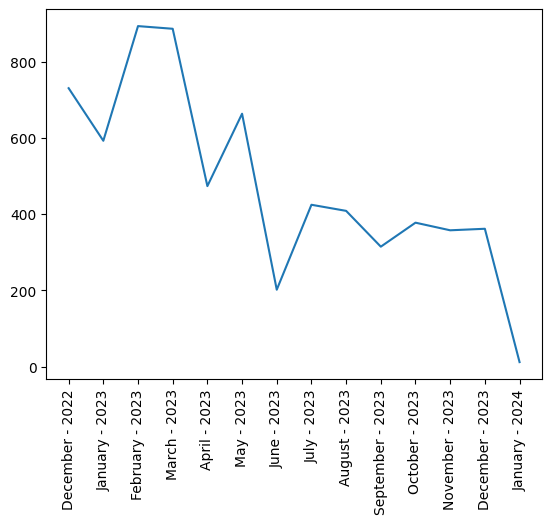

In [16]:
import matplotlib.pyplot as plt
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')

In [17]:
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07,12
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07,12
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07,12


In [18]:
df['dayname']=df['date'].dt.day_name()

df['only_date']=df['date'].dt.date
df

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07,12
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07,12
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07,12
...,...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01,1
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01,1
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01,1
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01,1


In [19]:
df.groupby('only_date').count()['message'].reset_index()

,only_date,message
0,2022-12-07,37
1,2022-12-08,23
2,2022-12-09,6
3,2022-12-11,3
4,2022-12-12,15
...,...,...
337,2023-12-26,10
338,2023-12-27,2
339,2023-12-30,36
340,2023-12-31,19


In [20]:
df['dayname'].value_counts().reset_index().rename(columns={'count':'message'})

,dayname,message
0,Monday,1222
1,Wednesday,1202
2,Friday,1160
3,Thursday,951
4,Tuesday,903
5,Saturday,706
6,Sunday,560


In [21]:
df['month'].value_counts().reset_index().rename(columns={'count':'message'})

,month,message
0,December,1093
1,February,894
2,March,887
3,May,664
4,January,605
5,April,474
6,July,425
7,August,409
8,October,378
9,November,358


In [22]:
def get_time_period(hour):
    if 0<=hour<1:
        return "12AM - 1AM"
    elif 1<= hour <11:
        return f'{str(hour)}AM - {str(hour+1)}AM'
    elif hour == 11:
        return '11AM - 12PM'
    elif hour == 12:
        return '12PM - 1PM'
    elif hour == 23:
        return f'{str(hour-12)}PM - 12AM'
    elif 12 < hour <23:
        return f'{str(hour-12)}PM - {str(hour-11)}PM'
def get_time_period_dotted(hour):
    if 0<=hour<1:
        return "12AM - 1AM"
    elif 1<= hour <11:
        return f'{str(hour)[:-2]}AM - {str(hour+1)[:-2]}AM'
    elif hour == 11:
        return '11AM - 12PM'
    elif hour == 12:
        return '12PM - 1PM'
    elif hour == 23:
        return f'{str(hour-12)[:-2]}PM - 12AM'
    elif 12 < hour <23:
        return f'{str(hour-12)[:-2]}PM - {str(hour-11)[:-2]}PM'
        
        
    
df['period'] = df['hour'].apply(get_time_period)
df['period'].unique()


array(['1PM - 2PM', '2PM - 3PM', '3PM - 4PM', '4PM - 5PM', '6PM - 7PM',
       '8PM - 9PM', '9PM - 10PM', '9AM - 10AM', '12PM - 1PM',
       '10PM - 11PM', '7AM - 8AM', '8AM - 9AM', '11AM - 12PM',
       '10AM - 11AM', '5PM - 6PM', '7PM - 8PM', '12AM - 1AM', '1AM - 2AM',
       '6AM - 7AM', '11PM - 12AM', '2AM - 3AM', '4AM - 5AM', '3AM - 4AM',
       '5AM - 6AM'], dtype=object)

In [23]:
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07,12,1PM - 2PM
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07,12,1PM - 2PM
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07,12,1PM - 2PM
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07,12,1PM - 2PM
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07,12,1PM - 2PM


In [24]:
change=False
for i in df['period'].unique():
    if '.' in str(i):
        change=True
        break
if change:
    df.drop('period',axis=1)
    df['period'] = df['hour'].apply(get_time_period_dotted)
period=df['period'].unique()

def convert_to_24_hour(time_range):
    start_time, end_time = time_range.split(' - ')
    start_dt = datetime.strptime(start_time, '%I%p')
    end_dt = datetime.strptime(end_time, '%I%p')
    
    return start_dt.strftime('%H:%M') + ' - ' + end_dt.strftime('%H:%M')

period = sorted(period, key=convert_to_24_hour)






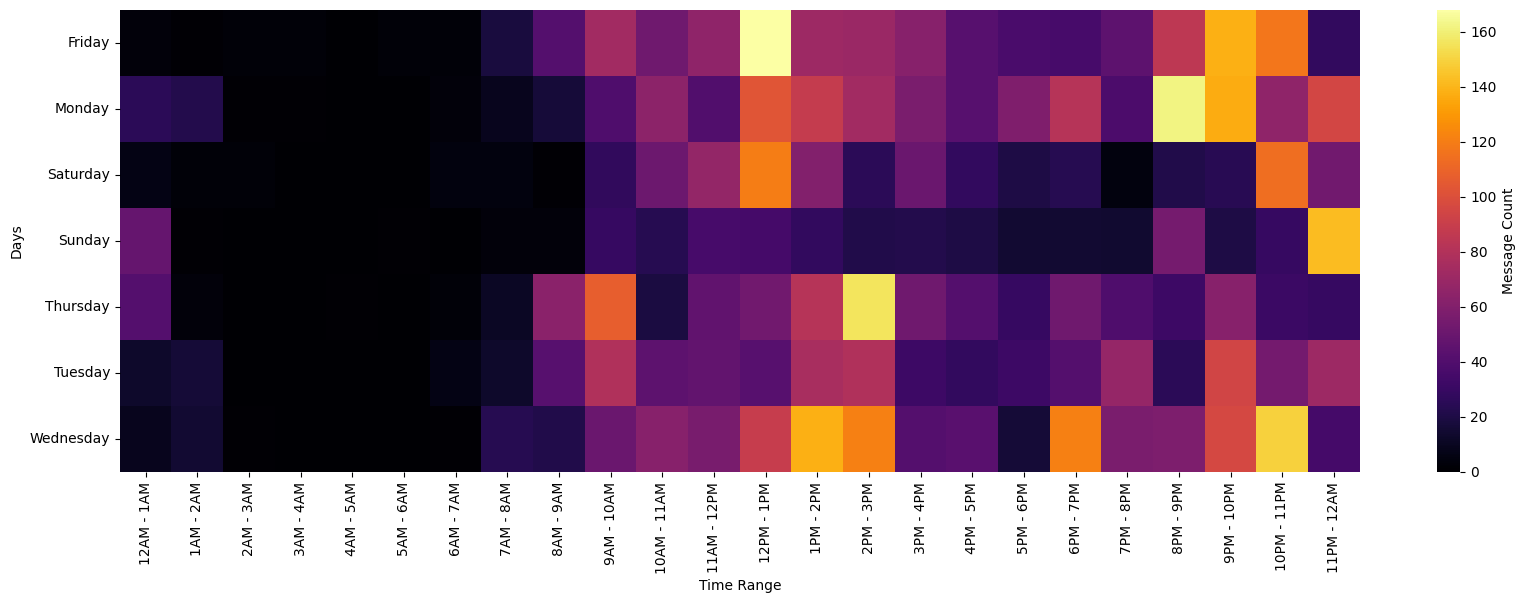

In [25]:
import seaborn as sns

df['period'] = pd.Categorical(df['period'], categories=period, ordered=True)
df.head()
plt.figure(figsize=(20,6))
heatmap_data = df.pivot_table(index='dayname', columns='period', values='message', aggfunc='count').fillna(0)
sns.heatmap(heatmap_data, cmap='inferno', cbar_kws={'label': 'Message Count'})
plt.xlabel('Time Range')
plt.ylabel('Days')
plt.show()

In [26]:
df.pivot_table(index='dayname', columns='period', values='message', aggfunc='count').fillna(0)

period,12AM - 1AM,1AM - 2AM,2AM - 3AM,3AM - 4AM,4AM - 5AM,5AM - 6AM,6AM - 7AM,7AM - 8AM,8AM - 9AM,9AM - 10AM,...,2PM - 3PM,3PM - 4PM,4PM - 5PM,5PM - 6PM,6PM - 7PM,7PM - 8PM,8PM - 9PM,9PM - 10PM,10PM - 11PM,11PM - 12AM
dayname,,,,,,,,,,,,,,,,,,,,,
Friday,3,1,2,2,0,2,2,18,41,73,...,70,62,42,37,36,45,85,138,117,28
Monday,25,22,1,1,0,0,3,9,17,39,...,73,57,42,59,82,38,162,137,65,95
Saturday,6,2,2,0,0,0,4,4,1,27,...,25,50,28,20,23,4,21,24,114,53
Sunday,48,1,0,0,0,1,0,3,3,29,...,21,22,20,15,15,14,55,20,29,142
Thursday,41,3,0,0,1,0,2,11,63,107,...,156,52,41,29,52,39,32,62,31,29
Tuesday,13,16,0,0,0,0,6,13,42,79,...,79,32,28,32,41,68,25,94,54,71
Wednesday,9,15,1,0,0,0,1,23,21,50,...,121,41,43,16,121,57,58,96,149,35


In [27]:
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07,12,1PM - 2PM
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07,12,1PM - 2PM
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07,12,1PM - 2PM
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07,12,1PM - 2PM
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07,12,1PM - 2PM


In [28]:

from textblob import TextBlob


In [29]:
df = df[~df['user'].str.contains('added')]
df = df[~df['user'].str.contains('left')]
df = df[~df['user'].str.contains('security')]
df = df[~df['user'].str.contains('changed')]
df = df[~df['user'].str.contains('removed')]
df = df[~df['user'].str.contains('deleted')]
df = df[~df['user'].str.contains('joined')]
df = df[~df['user'].str.contains('created')]
df = df[~df['message'].str.contains('<Media omitted>')]
keywords = ['added', 'left', 'security', 'changed', 'removed', 'deleted', 'group-notification']
df = df[~df['user'].str.contains('|'.join(keywords))]
f=open('stop_hinglish.txt','r')
stop_hinglish=f.read()
def remove_stop_words(sentence):
    return ' '.join(word for word in sentence.lower().split() if word not in stop_hinglish)

# Apply the function to the 'message' column
df['message'] = df['message'].apply(remove_stop_words)
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period
6,2022-12-07 14:25:00,Dheepan,class 2.30 2nd floor room no. 308,2022,December,7,14,25,PM,Wednesday,2022-12-07,12,2PM - 3PM
18,2022-12-07 15:52:00,Dheepan,friends join group send numbers,2022,December,7,15,52,PM,Wednesday,2022-12-07,12,3PM - 4PM
19,2022-12-07 15:53:00,Nilanjan Ghosh,pratyush.vcf (file attached),2022,December,7,15,53,PM,Wednesday,2022-12-07,12,3PM - 4PM
22,2022-12-07 16:15:00,Udhaya MCA,"students shared documents verification, mail d...",2022,December,7,16,15,PM,Wednesday,2022-12-07,12,4PM - 5PM
23,2022-12-07 16:16:00,Dheepan,ksjoseph.csc@pondiuni.ac.in,2022,December,7,16,16,PM,Wednesday,2022-12-07,12,4PM - 5PM


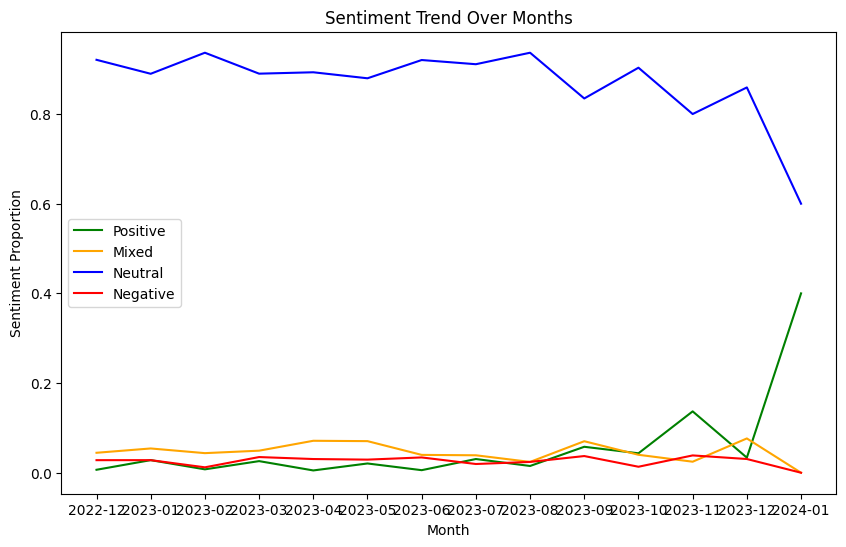

sentiment_category only_date  negative   neutral     mixed  positive
0                    2022-12  0.028007  0.920923  0.044481  0.006590
1                    2023-01  0.028056  0.889780  0.054108  0.028056
2                    2023-02  0.012048  0.936747  0.043675  0.007530
3                    2023-03  0.034929  0.890039  0.049159  0.025873
4                    2023-04  0.030534  0.893130  0.071247  0.005089
5                    2023-05  0.029210  0.879725  0.070447  0.020619
6                    2023-06  0.034091  0.920455  0.039773  0.005682
7                    2023-07  0.019444  0.911111  0.038889  0.030556
8                    2023-08  0.024096  0.936747  0.024096  0.015060
9                    2023-09  0.037190  0.834711  0.070248  0.057851
10                   2023-10  0.013333  0.903333  0.040000  0.043333
11                   2023-11  0.038596  0.800000  0.024561  0.136842
12                   2023-12  0.030581  0.859327  0.076453  0.033639
13                   2024-01  0.00

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period,sentiment,sentiment_category
6,2022-12-07 14:25:00,Dheepan,class 2.30 2nd floor room no. 308,2022,December,7,14,25,PM,Wednesday,2022-12-07,12,2PM - 3PM,0.0,neutral
18,2022-12-07 15:52:00,Dheepan,friends join group send numbers,2022,December,7,15,52,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral
19,2022-12-07 15:53:00,Nilanjan Ghosh,pratyush.vcf (file attached),2022,December,7,15,53,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral
22,2022-12-07 16:15:00,Udhaya MCA,"students shared documents verification, mail d...",2022,December,7,16,15,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral
23,2022-12-07 16:16:00,Dheepan,ksjoseph.csc@pondiuni.ac.in,2022,December,7,16,16,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral


In [30]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Assuming 'only_date' is a column in the DataFrame
df['only_date'] = pd.to_datetime(df['only_date'])

def get_sentiment_polarity(message):
    analysis = TextBlob(message)
    return analysis.sentiment.polarity

df['sentiment'] = df['message'].apply(get_sentiment_polarity)

df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-1, -0.1, 0.1, 0.5, 1], 
                                  labels=['negative', 'neutral', 'mixed', 'positive'])

# Group by month and calculate the average sentiment for each month
monthly_sentiment = df.groupby(df['only_date'].dt.to_period("M"))['sentiment_category'].value_counts(normalize=True).unstack().reset_index()

# Convert PeriodIndex to string for plotting
monthly_sentiment['only_date'] = monthly_sentiment['only_date'].astype(str)

# Plot sentiments with different colors
fig, ax = plt.subplots(figsize=(10, 6))

# Plot positive sentiment as a green line
ax.plot(monthly_sentiment['only_date'], monthly_sentiment['positive'], color='green', label='Positive')

# Plot mixed sentiment as an orange line
ax.plot(monthly_sentiment['only_date'], monthly_sentiment['mixed'], color='orange', label='Mixed')

# Plot neutral sentiment as a blue line
ax.plot(monthly_sentiment['only_date'], monthly_sentiment['neutral'], color='blue', label='Neutral')

# Plot negative sentiment as a red line
ax.plot(monthly_sentiment['only_date'], monthly_sentiment['negative'], color='red', label='Negative')

# Add legend
ax.legend()

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Proportion')
ax.set_title('Sentiment Trend Over Months')

# Show the plot
plt.show()
print(monthly_sentiment)
df.head()


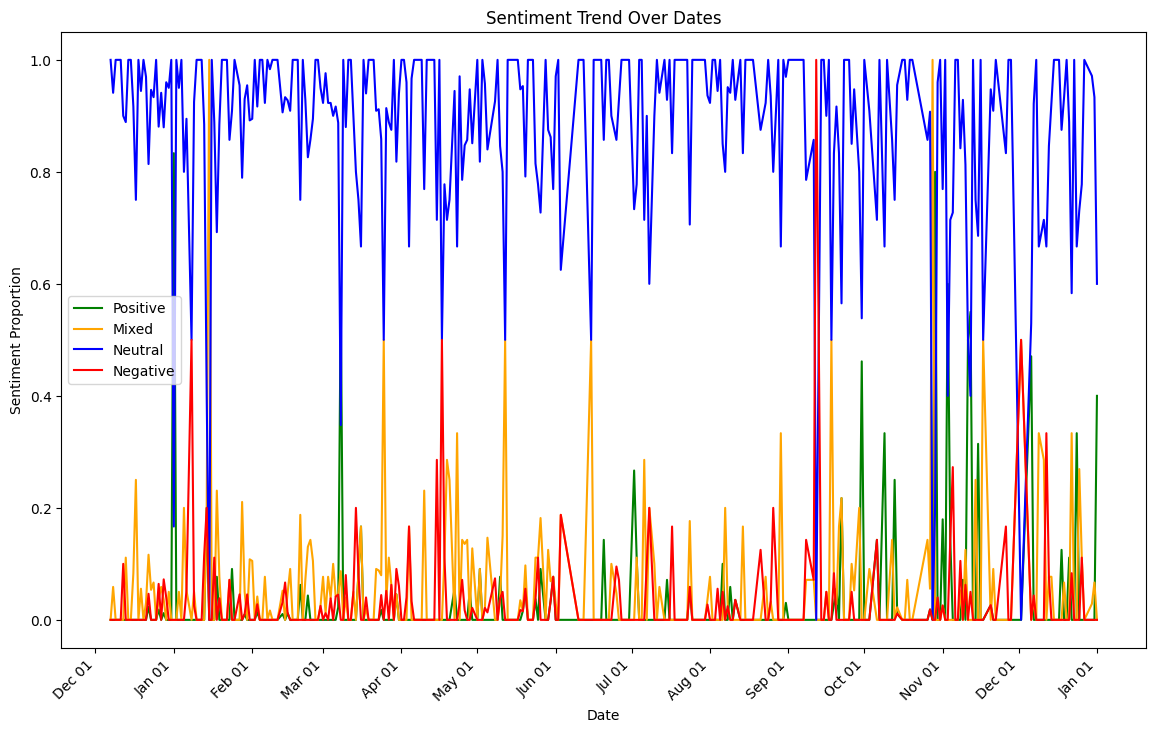

sentiment_category  only_date  negative   neutral     mixed  positive
0                  2022-12-07  0.000000  1.000000  0.000000       0.0
1                  2022-12-08  0.000000  0.941176  0.058824       0.0
2                  2022-12-09  0.000000  1.000000  0.000000       0.0
3                  2022-12-11  0.000000  1.000000  0.000000       0.0
4                  2022-12-12  0.100000  0.900000  0.000000       0.0
..                        ...       ...       ...       ...       ...
319                2023-12-26  0.111111  0.777778  0.111111       0.0
320                2023-12-27  0.000000  1.000000  0.000000       0.0
321                2023-12-30  0.000000  0.971429  0.028571       0.0
322                2023-12-31  0.000000  0.933333  0.066667       0.0
323                2024-01-01  0.000000  0.600000  0.000000       0.4

[324 rows x 5 columns]


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period,sentiment,sentiment_category
6,2022-12-07 14:25:00,Dheepan,class 2.30 2nd floor room no. 308,2022,December,7,14,25,PM,Wednesday,2022-12-07,12,2PM - 3PM,0.0,neutral
18,2022-12-07 15:52:00,Dheepan,friends join group send numbers,2022,December,7,15,52,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral
19,2022-12-07 15:53:00,Nilanjan Ghosh,pratyush.vcf (file attached),2022,December,7,15,53,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral
22,2022-12-07 16:15:00,Udhaya MCA,"students shared documents verification, mail d...",2022,December,7,16,15,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral
23,2022-12-07 16:16:00,Dheepan,ksjoseph.csc@pondiuni.ac.in,2022,December,7,16,16,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral


In [31]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'only_date' is a column in the DataFrame
df['only_date'] = pd.to_datetime(df['only_date'])

def get_sentiment_polarity(message):
    analysis = TextBlob(message)
    return analysis.sentiment.polarity

df['sentiment'] = df['message'].apply(get_sentiment_polarity)

df['sentiment_category'] = pd.cut(df['sentiment'], bins=[-1, -0.1, 0.1, 0.5, 1], 
                                  labels=['negative', 'neutral', 'mixed', 'positive'])

# Group by day and calculate the average sentiment for each day
daily_sentiment = df.groupby(df['only_date'].dt.to_period("D"))['sentiment_category'].value_counts(normalize=True).unstack().reset_index()

# Convert PeriodIndex to datetime for plotting
daily_sentiment['only_date'] = daily_sentiment['only_date'].dt.to_timestamp()

# Plot sentiments with different colors
fig, ax = plt.subplots(figsize=(14, 8))

# Plot positive sentiment as a green line
ax.plot(daily_sentiment['only_date'], daily_sentiment['positive'], color='green', label='Positive')

# Plot mixed sentiment as an orange line
ax.plot(daily_sentiment['only_date'], daily_sentiment['mixed'], color='orange', label='Mixed')

# Plot neutral sentiment as a blue line
ax.plot(daily_sentiment['only_date'], daily_sentiment['neutral'], color='blue', label='Neutral')

# Plot negative sentiment as a red line
ax.plot(daily_sentiment['only_date'], daily_sentiment['negative'], color='red', label='Negative')

# Add legend
ax.legend()

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Proportion')
ax.set_title('Sentiment Trend Over Dates')

# Format x-axis to avoid clutter
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()
print(daily_sentiment)
df.head()


In [32]:
def get_polarity(message):
    analysis = TextBlob(message)
    return analysis.sentiment.polarity

# Apply the function to the 'message' column
df['polarity'] = df['message'].apply(get_polarity)

# Display the DataFrame with the added 'polarity' column
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period,sentiment,sentiment_category,polarity
6,2022-12-07 14:25:00,Dheepan,class 2.30 2nd floor room no. 308,2022,December,7,14,25,PM,Wednesday,2022-12-07,12,2PM - 3PM,0.0,neutral,0.0
18,2022-12-07 15:52:00,Dheepan,friends join group send numbers,2022,December,7,15,52,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0
19,2022-12-07 15:53:00,Nilanjan Ghosh,pratyush.vcf (file attached),2022,December,7,15,53,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0
22,2022-12-07 16:15:00,Udhaya MCA,"students shared documents verification, mail d...",2022,December,7,16,15,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0
23,2022-12-07 16:16:00,Dheepan,ksjoseph.csc@pondiuni.ac.in,2022,December,7,16,16,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0


In [33]:
sentiment_percentages = df['sentiment_category'].value_counts(normalize=True) * 100

sentiment_percentages.reset_index().rename(columns={"proportion":"percentage"})

,sentiment_category,percentage
0,neutral,89.459459
1,mixed,5.045045
2,positive,2.792793
3,negative,2.702703


In [34]:
df['sentiment'].unique()

array([ 0.        ,  0.5       , -0.1       ,  0.2       , -0.05555556,
        0.4       ,  0.1375    ,  0.075     ,  0.05      ,  0.1       ,
        0.02      ,  0.0325    , -0.4       ,  0.13333333,  0.21666667,
        0.375     ,  0.7       ,  0.43333333, -0.3       ,  0.125     ,
        0.25      ,  0.39002976, -0.25      ,  0.0875    , -0.2       ,
       -0.5       , -0.75      ,  0.8       ,  0.6       ,  0.2       ,
        0.12857143,  0.13636364, -0.41666667, -0.125     ,  0.06666667,
        0.3       , -0.16666667,  0.23333333,  0.16666667,  0.1       ,
       -0.03809524,  0.05      , -0.15555556, -0.10714286,  0.02619048,
        1.        ,  0.35      ,  0.42789116,  0.41666667,  0.15      ,
        0.21428571,  0.85      , -0.0625    ,  0.03333333,  0.35714286,
        0.6       ,  0.30833333,  0.09166667,  0.11428571, -0.15      ,
        0.55      ,  0.22727273,  0.26666667,  0.45      ,  0.095     ,
       -0.01388889, -0.7       ,  0.27833333,  0.12291667, -0.07

In [35]:
df['polarity'].unique()

array([ 0.        ,  0.5       , -0.1       ,  0.2       , -0.05555556,
        0.4       ,  0.1375    ,  0.075     ,  0.05      ,  0.1       ,
        0.02      ,  0.0325    , -0.4       ,  0.13333333,  0.21666667,
        0.375     ,  0.7       ,  0.43333333, -0.3       ,  0.125     ,
        0.25      ,  0.39002976, -0.25      ,  0.0875    , -0.2       ,
       -0.5       , -0.75      ,  0.8       ,  0.6       ,  0.2       ,
        0.12857143,  0.13636364, -0.41666667, -0.125     ,  0.06666667,
        0.3       , -0.16666667,  0.23333333,  0.16666667,  0.1       ,
       -0.03809524,  0.05      , -0.15555556, -0.10714286,  0.02619048,
        1.        ,  0.35      ,  0.42789116,  0.41666667,  0.15      ,
        0.21428571,  0.85      , -0.0625    ,  0.03333333,  0.35714286,
        0.6       ,  0.30833333,  0.09166667,  0.11428571, -0.15      ,
        0.55      ,  0.22727273,  0.26666667,  0.45      ,  0.095     ,
       -0.01388889, -0.7       ,  0.27833333,  0.12291667, -0.07

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/anon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming you have a DataFrame named df with columns 'message' and 'polarity'
# If your 'polarity' column contains sentiment scores, you can skip the next two lines
# and replace 'polarity' with the actual sentiment scores in the subsequent steps.

# Example DataFrame creation


# Provide the path to your vader_lexicon.txt file
vader_lexicon_path = '/home/anon/Desktop/Sentiment analysis Project/vader_lexicon.txt'

# Initialize SentimentIntensityAnalyzer with the lexicon file
sia = SentimentIntensityAnalyzer(lexicon_file=vader_lexicon_path)

# Function to get emotions using NLTK's SentimentIntensityAnalyzer
def get_emotion_nltk(text):
    sentiment_score = sia.polarity_scores(text)
    emotion = sentiment_score['compound']
    return emotion

# Apply the function to your DataFrame
df['emotion_nltk'] = df['message'].apply(get_emotion_nltk)

# Mapping emotions to labels
def map_to_emotion_label(emotion_score):
    if emotion_score > 0.2:
        return 'Joy'
    elif emotion_score < -0.2:
        return 'Sadness'
    elif emotion_score < 0:
        return 'Anger'
    else:
        return 'Neutral'

# Apply the mapping function
df['emotion_label_nltk'] = df['emotion_nltk'].apply(map_to_emotion_label)

# Display the resulting DataFrame
df.head()


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period,sentiment,sentiment_category,polarity,emotion_nltk,emotion_label_nltk
6,2022-12-07 14:25:00,Dheepan,class 2.30 2nd floor room no. 308,2022,December,7,14,25,PM,Wednesday,2022-12-07,12,2PM - 3PM,0.0,neutral,0.0,-0.2960,Sadness
18,2022-12-07 15:52:00,Dheepan,friends join group send numbers,2022,December,7,15,52,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0,0.6486,Joy
19,2022-12-07 15:53:00,Nilanjan Ghosh,pratyush.vcf (file attached),2022,December,7,15,53,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0,0.0000,Neutral
22,2022-12-07 16:15:00,Udhaya MCA,"students shared documents verification, mail d...",2022,December,7,16,15,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0,0.3400,Joy
23,2022-12-07 16:16:00,Dheepan,ksjoseph.csc@pondiuni.ac.in,2022,December,7,16,16,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0,0.0000,Neutral


In [38]:
emotion_percentages = df['emotion_label_nltk'].value_counts(normalize=True) * 100
emotion_percentages.reset_index()

,emotion_label_nltk,proportion
0,Neutral,82.471627
1,Joy,12.520267
2,Sadness,4.143398
3,Anger,0.864709


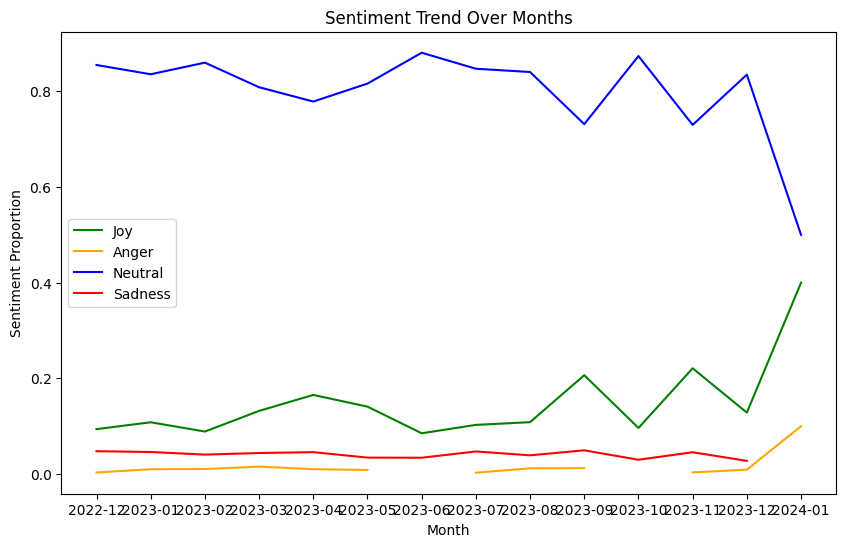

emotion_label_nltk only_date     Anger       Joy   Neutral   Sadness
0                    2022-12  0.003295  0.093904  0.855025  0.047776
1                    2023-01  0.010020  0.108216  0.835671  0.046092
2                    2023-02  0.010542  0.088855  0.859940  0.040663
3                    2023-03  0.015524  0.131953  0.808538  0.043984
4                    2023-04  0.010178  0.165394  0.778626  0.045802
5                    2023-05  0.008591  0.140893  0.816151  0.034364
6                    2023-06       NaN  0.085227  0.880682  0.034091
7                    2023-07  0.002778  0.102778  0.847222  0.047222
8                    2023-08  0.012048  0.108434  0.840361  0.039157
9                    2023-09  0.012397  0.206612  0.731405  0.049587
10                   2023-10       NaN  0.096346  0.873754  0.029900
11                   2023-11  0.003509  0.221053  0.729825  0.045614
12                   2023-12  0.009174  0.128440  0.834862  0.027523
13                   2024-01  0.10

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period,sentiment,sentiment_category,polarity,emotion_nltk,emotion_label_nltk
6,2022-12-07 14:25:00,Dheepan,class 2.30 2nd floor room no. 308,2022,December,7,14,25,PM,Wednesday,2022-12-07,12,2PM - 3PM,0.0,neutral,0.0,-0.2960,Sadness
18,2022-12-07 15:52:00,Dheepan,friends join group send numbers,2022,December,7,15,52,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0,0.6486,Joy
19,2022-12-07 15:53:00,Nilanjan Ghosh,pratyush.vcf (file attached),2022,December,7,15,53,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0,0.0000,Neutral
22,2022-12-07 16:15:00,Udhaya MCA,"students shared documents verification, mail d...",2022,December,7,16,15,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0,0.3400,Joy
23,2022-12-07 16:16:00,Dheepan,ksjoseph.csc@pondiuni.ac.in,2022,December,7,16,16,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0,0.0000,Neutral


In [39]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Assuming 'only_date' is a column in the DataFrame
df['only_date'] = pd.to_datetime(df['only_date'])

# Group by month and calculate the average sentiment for each month
monthly_sentiment = df.groupby(df['only_date'].dt.to_period("M"))['emotion_label_nltk'].value_counts(normalize=True).unstack().reset_index()

# Convert PeriodIndex to string for plotting
monthly_sentiment['only_date'] = monthly_sentiment['only_date'].astype(str)

# Plot sentiments with different colors
fig, ax = plt.subplots(figsize=(10, 6))

# Plot positive sentiment as a green line
ax.plot(monthly_sentiment['only_date'], monthly_sentiment['Joy'], color='green', label='Joy')

# Plot mixed sentiment as an orange line
ax.plot(monthly_sentiment['only_date'], monthly_sentiment['Anger'], color='orange', label='Anger')

# Plot neutral sentiment as a blue line
ax.plot(monthly_sentiment['only_date'], monthly_sentiment['Neutral'], color='blue', label='Neutral')

# Plot negative sentiment as a red line
ax.plot(monthly_sentiment['only_date'], monthly_sentiment['Sadness'], color='red', label='Sadness')

# Add legend
ax.legend()

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Proportion')
ax.set_title('Sentiment Trend Over Months')

# Show the plot
plt.show()
print(monthly_sentiment)
df.head()


In [40]:
def classify_subjectivity(message):
    analysis = TextBlob(message)
    if analysis.sentiment.subjectivity > 0.5:  # You can adjust the threshold as needed
        return 'Subjective'
    else:
        return 'Objective'

# Apply the function to the 'message' column
df['subjectivity'] = df['message'].apply(classify_subjectivity)
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period,sentiment,sentiment_category,polarity,emotion_nltk,emotion_label_nltk,subjectivity
6,2022-12-07 14:25:00,Dheepan,class 2.30 2nd floor room no. 308,2022,December,7,14,25,PM,Wednesday,2022-12-07,12,2PM - 3PM,0.0,neutral,0.0,-0.2960,Sadness,Objective
18,2022-12-07 15:52:00,Dheepan,friends join group send numbers,2022,December,7,15,52,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0,0.6486,Joy,Objective
19,2022-12-07 15:53:00,Nilanjan Ghosh,pratyush.vcf (file attached),2022,December,7,15,53,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0,0.0000,Neutral,Objective
22,2022-12-07 16:15:00,Udhaya MCA,"students shared documents verification, mail d...",2022,December,7,16,15,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0,0.3400,Joy,Objective
23,2022-12-07 16:16:00,Dheepan,ksjoseph.csc@pondiuni.ac.in,2022,December,7,16,16,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0,0.0000,Neutral,Objective


In [41]:
subjectivity_percentages = df['subjectivity'].value_counts(normalize=True) * 100
subjectivity_percentages.reset_index()

,subjectivity,proportion
0,Objective,92.217618
1,Subjective,7.782382


In [42]:
df['only_date'] = pd.to_datetime(df['only_date'])
trend_df = df.groupby(df['only_date'].dt.to_period("M"))['subjectivity'].value_counts(normalize=True).unstack().reset_index().fillna(0)
trend_df['only_date'] = trend_df['only_date'].dt.to_timestamp()
trend_df


subjectivity,only_date,Objective,Subjective
0,2022-12-01,0.947282,0.052718
1,2023-01-01,0.919840,0.080160
2,2023-02-01,0.959337,0.040663
3,2023-03-01,0.910737,0.089263
4,2023-04-01,0.928753,0.071247
5,2023-05-01,0.908935,0.091065
6,2023-06-01,0.948864,0.051136
7,2023-07-01,0.936111,0.063889
8,2023-08-01,0.957831,0.042169
9,2023-09-01,0.876033,0.123967


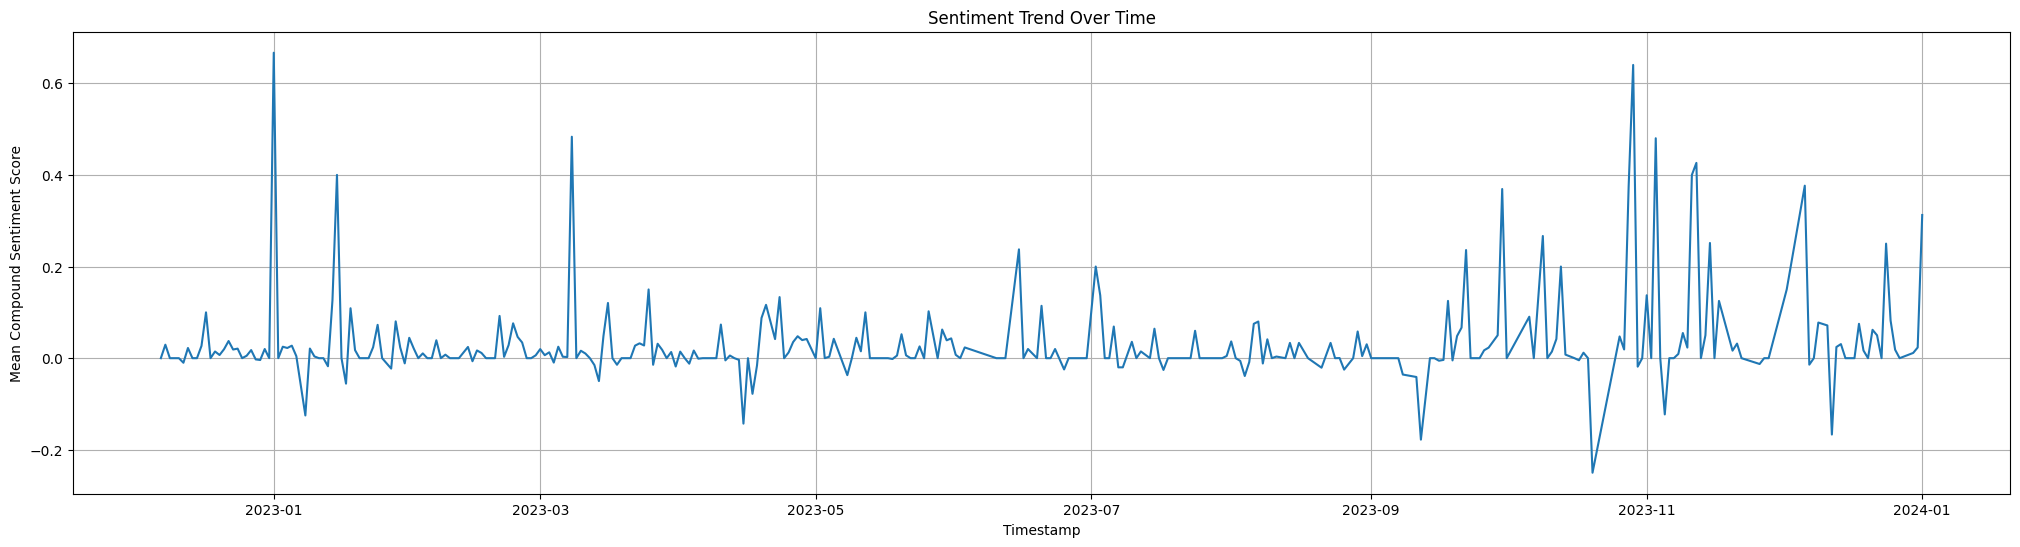

In [43]:
df_grouped = df.groupby('only_date')['polarity'].mean().reset_index()


# Plot the trend over timedf_grouped = df.groupby('only_date')['polarity'].mean().reset_index()
plt.figure(figsize=(25, 6))
plt.plot(df_grouped['only_date'], df_grouped['polarity'])
plt.title('Sentiment Trend Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Mean Compound Sentiment Score')
plt.grid(True)
plt.show()

In [44]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming df is a DataFrame with a 'message' column
messages = df['message'].astype(str)

# Step 1: Vectorize the messages
vectorizer = CountVectorizer(stop_words='english')  # Provide stop_words as a string 'english'
X = vectorizer.fit_transform(messages)

# Step 2: Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Step 3: Apply Latent Dirichlet Allocation (LDA)
n_topics = 5  # You can adjust the number of topics based on your needs
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_tfidf)

# Step 4: Get the top words for each topic and use them as topic names
feature_names = vectorizer.get_feature_names_out()
topic_keywords = {}
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-6:-1]  # Get the top 5 keywords
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    topic_name = ' '.join(top_keywords)
    topic_keywords[topic_name] = top_keywords

# Step 5: Print or use the topics and their keywords
for topic_name, keywords in topic_keywords.items():
    print(f'{topic_name}: {", ".join(keywords)}')


group contact send fast theory: group, contact, send, fast, theory
seminar lab happy classes tomorrow: seminar, lab, happy, classes, tomorrow
30 10 11 web 12: 30, 10, 11, web, 12
bro eid option internal mubarak: bro, eid, option, internal, mubarak
class today lab birthday happy: class, today, lab, birthday, happy


In [46]:
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period,sentiment,sentiment_category,polarity,emotion_nltk,emotion_label_nltk,subjectivity
6,2022-12-07 14:25:00,Dheepan,class 2.30 2nd floor room no. 308,2022,December,7,14,25,PM,Wednesday,2022-12-07,12,2PM - 3PM,0.0,neutral,0.0,-0.2960,Sadness,Objective
18,2022-12-07 15:52:00,Dheepan,friends join group send numbers,2022,December,7,15,52,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0,0.6486,Joy,Objective
19,2022-12-07 15:53:00,Nilanjan Ghosh,pratyush.vcf (file attached),2022,December,7,15,53,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0,0.0000,Neutral,Objective
22,2022-12-07 16:15:00,Udhaya MCA,"students shared documents verification, mail d...",2022,December,7,16,15,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0,0.3400,Joy,Objective
23,2022-12-07 16:16:00,Dheepan,ksjoseph.csc@pondiuni.ac.in,2022,December,7,16,16,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0,0.0000,Neutral,Objective


In [47]:
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number,period,sentiment,sentiment_category,polarity,emotion_nltk,emotion_label_nltk,subjectivity
6,2022-12-07 14:25:00,Dheepan,class 2.30 2nd floor room no. 308,2022,December,7,14,25,PM,Wednesday,2022-12-07,12,2PM - 3PM,0.0,neutral,0.0,-0.2960,Sadness,Objective
18,2022-12-07 15:52:00,Dheepan,friends join group send numbers,2022,December,7,15,52,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0,0.6486,Joy,Objective
19,2022-12-07 15:53:00,Nilanjan Ghosh,pratyush.vcf (file attached),2022,December,7,15,53,PM,Wednesday,2022-12-07,12,3PM - 4PM,0.0,neutral,0.0,0.0000,Neutral,Objective
22,2022-12-07 16:15:00,Udhaya MCA,"students shared documents verification, mail d...",2022,December,7,16,15,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0,0.3400,Joy,Objective
23,2022-12-07 16:16:00,Dheepan,ksjoseph.csc@pondiuni.ac.in,2022,December,7,16,16,PM,Wednesday,2022-12-07,12,4PM - 5PM,0.0,neutral,0.0,0.0000,Neutral,Objective


In [48]:
import google.generativeai as palm
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from dotenv import load_dotenv
import os
load_dotenv()

# Configure Google Generative AI API
palm.configure(api_key=os.getenv("GOOGLE_API"))  # Replace with your actual API key

# Assuming df is a DataFrame with a 'message' column
messages = df['message'].astype(str)

# Step 1: Vectorize the messages
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(messages)

# Step 2: Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Step 3: Apply Latent Dirichlet Allocation (LDA)
n_topics = 5  # You can adjust the number of topics based on your needs
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_tfidf)

# Step 4: Get the top words for each topic and use them as input for Google Generative AI
feature_names = vectorizer.get_feature_names_out()
topic_keywords = {}
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-51:-1]  # Get the top 5 keywords
    top_keywords = [feature_names[i] for i in top_keywords_idx]

    # Use top keywords as input for Google Generative AI
    input_text = f"Generate a topic name in maximium 6 words based on the keywords: {', '.join(top_keywords)}"

    # Use Google Generative AI to generate topic name
    response = palm.generate_text(
        model="models/text-bison-001",  # Replace with the desired model
        prompt=input_text,
        max_output_tokens=50
    )
    topic_name = response.result.strip()

    topic_keywords[topic_name] = top_keywords

# Step 5: Print or use the topics and their keywords
for topic_name, keywords in topic_keywords.items():
    print(f'{topic_name}: {", ".join(keywords)}\n')


/home/anon/Desktop/Sentiment analysis Project/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


college life: group, contact, send, fast, theory, university, waiting, told, ma, mam, campus, softcore, placement, ohk, cr, assignment, number, details, great, started, leave, sorry, students, application, udhaya, photo, easy, maths, farhan, ille, stadium, talk, gave, tmrw, congrats, coordinator, yr, timetable, sheet, digvijay, life, sc, ok, blood, pondicherry, company, paper, college, bhaiya, ready

science lab: seminar, lab, happy, classes, tomorrow, attendance, today, class, holi, students, course, oops, day, year, bridge, 30, dsa, youtu, https, week, morning, science, holiday, means, okk, groups, list, cs, sir, pm, attend, 917671939221, group, birthday, problem, celebrate, mfcs, assignment, gya, extend, send, bank, si, ravi, topics, earth, workshop, yesterday, khana, available

Information Technology: 30, 10, 11, web, 12, chacha, class, dbms, schedule, kumari, development, hitesh, yess, start, saiful, afternoon, rishi, islam, sritam, subasri, mmt, prasad, raj, today, dsa, designing

In [49]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK data (if not already downloaded)
nltk.download('vader_lexicon')

# Specify the path to the Vader lexicon file
vader_lexicon_path = '/home/anon/Desktop/Sentiment analysis Project/vader_lexicon.txt'

# Sample DataFrame


# Function to get sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Function to get sentiment polarity using NLTK Vader with custom lexicon path
def get_vader_sentiment(text):
    sid = SentimentIntensityAnalyzer(lexicon_file=vader_lexicon_path)
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

# Apply sentiment analysis to the DataFrame
df['textblob_sentiment'] = df['message'].apply(get_sentiment)
df['vader_sentiment'] = df['message'].apply(get_vader_sentiment)

# Display the DataFrame with sentiment scores
print(df)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/anon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                    date            user  \
6    2022-12-07 14:25:00         Dheepan   
18   2022-12-07 15:52:00         Dheepan   
19   2022-12-07 15:53:00  Nilanjan Ghosh   
22   2022-12-07 16:15:00      Udhaya MCA   
23   2022-12-07 16:16:00         Dheepan   
...                  ...             ...   
6699 2024-01-01 00:23:00     Subasri MCA   
6700 2024-01-01 10:39:00       Soubhagya   
6701 2024-01-01 10:39:00       Soubhagya   
6702 2024-01-01 22:19:00       Nilay MCA   
6703 2024-01-01 22:20:00      Udhaya MCA   

                                                message  year     month  day  \
6                     class 2.30 2nd floor room no. 308  2022  December    7   
18                      friends join group send numbers  2022  December    7   
19                         pratyush.vcf (file attached)  2022  December    7   
22    students shared documents verification, mail d...  2022  December    7   
23                          ksjoseph.csc@pondiuni.ac.in  2022  December

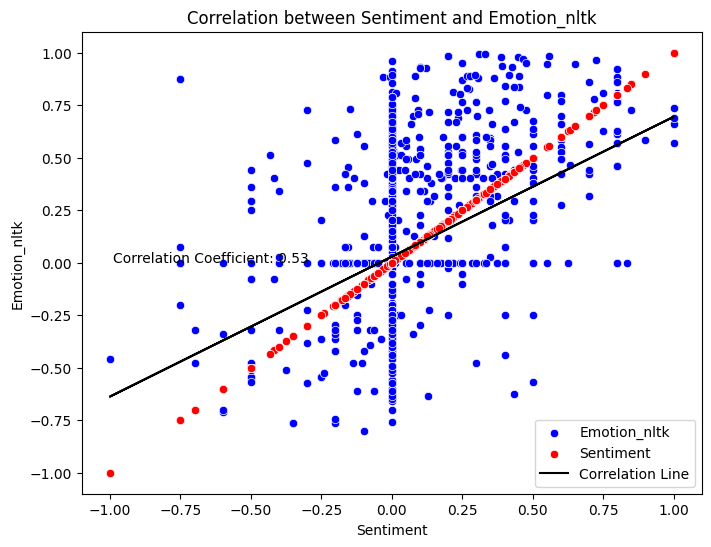

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiment', y='emotion_nltk', data=df, color='blue', label='Emotion_nltk')
sns.scatterplot(x='sentiment', y='sentiment', data=df, color='red', label='Sentiment')

# Plotting the correlation line
z = np.polyfit(df['sentiment'], df['emotion_nltk'], 1)
p = np.poly1d(z)
plt.plot(df['sentiment'], p(df['sentiment']), color='black', label='Correlation Line')

# Calculate and display the correlation coefficient
correlation_coefficient = df['sentiment'].corr(df['emotion_nltk'])
plt.text(0.05, 0.5, f'Correlation Coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)

# Set plot labels and title
plt.xlabel('Sentiment')
plt.ylabel('Emotion_nltk')
plt.title('Correlation between Sentiment and Emotion_nltk')

# Display legend
plt.legend()

# Show the plot
plt.show()


In [51]:
import google.generativeai as genai 
from IPython.display import display, Markdown
import textwrap
from dotenv import load_dotenv
genai.configure(api_key=os.getenv("GOOGLE_API"))
load_dotenv()

True

In [52]:
def to_mark_down(text):
    text = text.replace(".","*")
    return Markdown(textwrap.indent(text,">",predicate=lambda _:True))

In [55]:
csv_path = 'your_file.csv'
df.to_csv(csv_path, index=False)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5551 entries, 6 to 6703
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                5551 non-null   datetime64[ns]
 1   user                5551 non-null   object        
 2   message             5551 non-null   object        
 3   year                5551 non-null   int64         
 4   month               5551 non-null   object        
 5   day                 5551 non-null   int32         
 6   hour                5551 non-null   int32         
 7   minute              5551 non-null   int32         
 8   am/pm               5551 non-null   object        
 9   dayname             5551 non-null   object        
 10  only_date           5551 non-null   datetime64[ns]
 11  month_number        5551 non-null   int64         
 12  period              5551 non-null   category      
 13  sentiment           5551 non-null   float64       
 1

In [57]:
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,...,month_number,period,sentiment,sentiment_category,polarity,emotion_nltk,emotion_label_nltk,subjectivity,textblob_sentiment,vader_sentiment
6,2022-12-07 14:25:00,Dheepan,class 2.30 2nd floor room no. 308,2022,December,7,14,25,PM,Wednesday,...,12,2PM - 3PM,0.0,neutral,0.0,-0.2960,Sadness,Objective,0.0,-0.2960
18,2022-12-07 15:52:00,Dheepan,friends join group send numbers,2022,December,7,15,52,PM,Wednesday,...,12,3PM - 4PM,0.0,neutral,0.0,0.6486,Joy,Objective,0.0,0.6486
19,2022-12-07 15:53:00,Nilanjan Ghosh,pratyush.vcf (file attached),2022,December,7,15,53,PM,Wednesday,...,12,3PM - 4PM,0.0,neutral,0.0,0.0000,Neutral,Objective,0.0,0.0000
22,2022-12-07 16:15:00,Udhaya MCA,"students shared documents verification, mail d...",2022,December,7,16,15,PM,Wednesday,...,12,4PM - 5PM,0.0,neutral,0.0,0.3400,Joy,Objective,0.0,0.3400
23,2022-12-07 16:16:00,Dheepan,ksjoseph.csc@pondiuni.ac.in,2022,December,7,16,16,PM,Wednesday,...,12,4PM - 5PM,0.0,neutral,0.0,0.0000,Neutral,Objective,0.0,0.0000


In [53]:
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import DataFrameLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma